In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

In [ ]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from transformers import AutoTokenizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)
    return tweets_clean

In [ ]:
df = pd.DataFrame({'tweet': pos_tweets + neg_tweets, 'sentiment': [1] * len(pos_tweets) + [0] * len(neg_tweets)})

In [ ]:
print(df['tweet'].dtype)
print(df['tweet'].apply(type).value_counts())

object
tweet
<class 'str'>    10000
Name: count, dtype: int64


In [ ]:
df['tweet'] = df['tweet'].astype(str).fillna('')
df['cleaned_text'] = df['tweet'].apply(lambda x: ' '.join(process_tweet(x)))

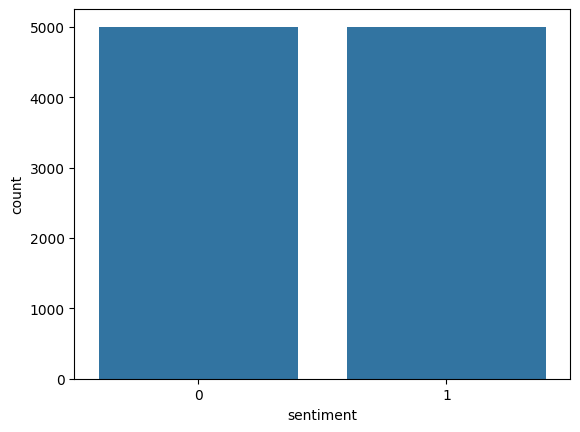

In [ ]:
sns.countplot(x=df['sentiment'])
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12299 (\N{RIGHT DOUBLE ANGLE BRACKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


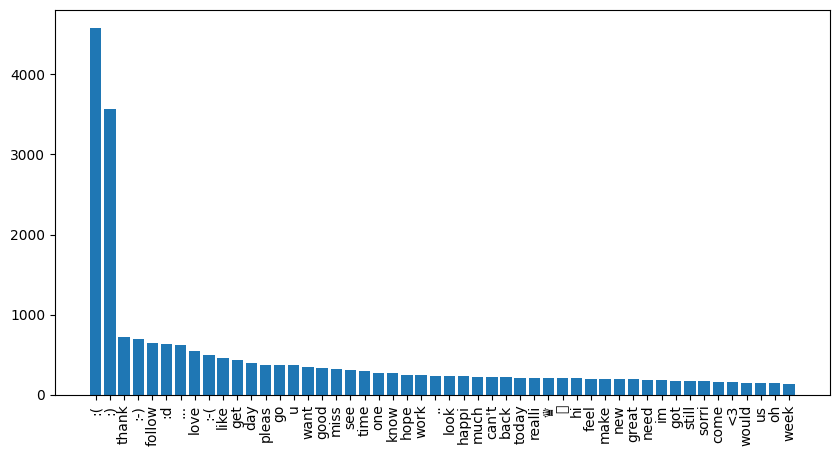

In [ ]:
from collections import Counter
words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(words)
word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
x, y = zip(*word_freq[:50])
plt.figure(figsize=(10,5))
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

count_vec = CountVectorizer()
X = count_vec.fit_transform(df['cleaned_text'])

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

In [ ]:
!pip uninstall numpy gensim -y
!pip install numpy gensim

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
df['embeddings'] = df['cleaned_text'].apply(lambda x: model.encode(x))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from nltk import bigrams
df['bigram_text'] = df['cleaned_text'].apply(lambda x: ' '.join(['_'.join(bg) for bg in bigrams(x.split())]))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['cleaned_text'].astype(str)
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100)
X_tfidf_pca = svd.fit_transform(X_tfidf)

In [ ]:
X_doc2vec = np.mean(X_tfidf.toarray(), axis=1).reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train,X_test,Y_train,Y_test = train_test_split(X_tfidf_pca,df['sentiment'],test_size=0.2,random_state=42)
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred = model1.predict(X_test)
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.66      0.80      0.72       988
           1       0.75      0.61      0.67      1012

    accuracy                           0.70      2000
   macro avg       0.71      0.70      0.70      2000
weighted avg       0.71      0.70      0.70      2000



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_logistic = accuracy_score(Y_test, model1.predict(X_test))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

X_train,X_test,Y_train,Y_test = train_test_split(X_tfidf,df['sentiment'],test_size=0.2,random_state=42)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train,Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.6522 - loss: 0.6684 - val_accuracy: 0.7375 - val_loss: 0.5589
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8503 - loss: 0.4530 - val_accuracy: 0.7437 - val_loss: 0.5007
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8903 - loss: 0.3217 - val_accuracy: 0.7375 - val_loss: 0.5119
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9176 - loss: 0.2376 - val_accuracy: 0.7369 - val_loss: 0.5453
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9331 - loss: 0.1943 - val_accuracy: 0.7312 - val_loss: 0.5892
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9441 - loss: 0.1630 - val_accuracy: 0.7200 - val_loss: 0.6305
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9529 - loss: 0.1399 - val_accuracy: 0.7256 - val_loss: 0.6684
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9578 - loss: 0.1224 - val_accu

In [ ]:
accuracy_nn = model2.evaluate(X_test, Y_test, verbose=0)[1]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df['sentiment'].describe()

,sentiment
count,10000.000000
mean,0.500000
std,0.500025
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(df['tweet'], df['sentiment'], test_size=0.2, random_state=42)

nb_pipeline = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',max_features=5000)),
    ('clf',MultinomialNB()),
])

nb_pipeline.fit(X_train, Y_train)

def predict_sentiment(text,model):
    return model.predict([text])[0]

def calculate_accuracy(X_test,Y_test,model):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    return accuracy

accuracy_nb = calculate_accuracy(X_test, Y_test, nb_pipeline)


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

start_time = time.time()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

classifier = pipeline(
    task="sentiment-analysis",
    model=model_name,
    tokenizer=model_name,
    device=0 if torch.cuda.is_available() else -1
)


def get_sentiment_label(result):
    if result['label'] == 'POSITIVE':
        return 1
    else:
        return 0

batch_size = 16
test_predictions = []

for i in range(0, len(test_df), batch_size):
    batch = test_df['tweet'][i:i+batch_size].tolist()
    results = classifier(batch)
    predictions = [get_sentiment_label(result) for result in results]
    test_predictions.extend(predictions)

elapsed_time = time.time() - start_time
accuracy = accuracy_score(test_df['sentiment'].tolist(), test_predictions)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
print(accuracy)

0.494


In [ ]:
print(accuracy_nb)

0.754


In [ ]:
print(accuracy_nn)

0.7074999809265137


In [ ]:
print(accuracy_logistic)

0.7005


In [ ]:
models = ["Logistic Regression", "Naive Bayes", "NN", "BERT"]
accuracies = [accuracy_logistic, accuracy_nb, accuracy_nn, accuracy]

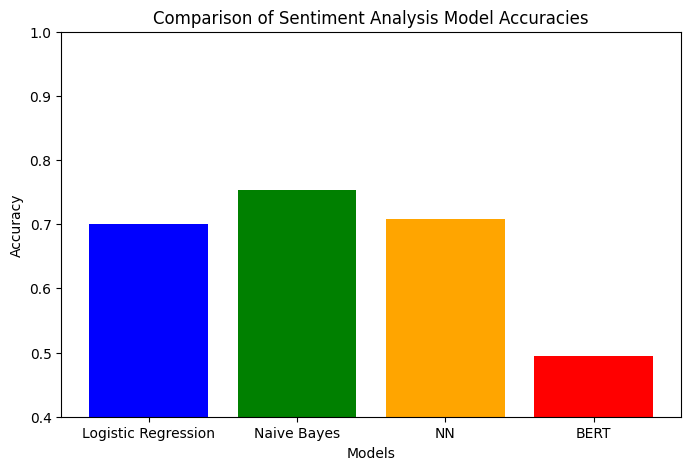

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.4, 1.0)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Sentiment Analysis Model Accuracies")
plt.show()